In [1]:
%run ./../libs/bayesianOptimization/python/gp.py
%run ./../libs/bayesianOptimization/python/plotters.py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from joblib import Parallel, delayed
import pickle
#rc('text', usetex=True)

In [2]:
def target(x1,x2):
    return  -1 *((4 - (2.1 * (x1**2)) + (x1**4)/3) * (x1**2) + x1*x2 + (-4 + 4*(x2**2)) * x2**2)

In [3]:
def camel(x):
    return  ((4 - (2.1 * (x[0]**2)) + (x[0]**4)/3) * (x[0]**2) + x[0]*x[1] + (-4 + 4*(x[1]**2)) * x[1]**2)

def negativeCamel(x):
    return  -1 *((4 - (2.1 * (x[0]**2)) + (x[0]**4)/3) * (x[0]**2) + x[0]*x[1] + (-4 + 4*(x[1]**2)) * x[1]**2)
camelBounds = np.array([[-3,3], [-2,2]])
camelOptimum = -1.0316

In [4]:
def ackley(x):
    x = x.reshape(-1,1)
    a = 20
    b = 0.2
    c = 2*np.pi
    d = x.shape[0]
    s1 = np.sum(np.square(x))
    s2 = np.sum(np.cos(c * x))
    return -a * np.exp(-1 * b * np.sqrt((1/d) * s1) ) - np.exp((1/d) * s2) + a + np.exp(1)

def negativeAckley(x):
    return -1 * ackley(x)
ackleyBounds = np.array([[-32.768, 32.768],[-32.768, 32.768]])
ackleyOptimum = 0.0

In [5]:
def boat(x):
    """
    Bohachevsky Function 1
    # Dim: 2
    minimum: f(0,0) = 0
    """
    return x[0]**2 + 2*x[1]**2 - 0.3 * np.cos(3*np.pi*x[0]) - 0.4 * np.cos(4*np.pi*x[1]) + 0.7

def negativeBoat(x):
    return -1 * boat(x)
boatBounds = np.array([[-100,100], [-100,100]])
boatOptimum = 0.0

In [6]:
def booth(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2
def negBooth(x):
    return -1 * booth(x)
boothBounds = np.array([[-10,10], [-10,10]])
boothOptimum = 0.0

In [7]:
def eason(x):
    return -1 * np.cos(x[0]) * np.cos(x[1]) * np.exp(-1 * (x[0] - np.pi)**2 - (x[1] - np.pi)**2)

def negativeEason(x):
    return -1 * eason(x)
easonBounds = np.array([[-100,100], [-100,100]])
easonOptimum = -1.00

In [8]:
ShekelBeta = np.array([1,2,2,4,4,6,3,7,5,5]) / 10
ShekelC = np.array([[4,1,8,6,3,2,5,8,6,7],
                    [4,1,8,6,7,9,3,1,2,3.6],
                    [4,1,8,6,3,2,5,8,6,7],
                    [4,1,8,6,7,9,3,1,2,3.6]])

In [9]:
class Problem:
    def __init__(self, name, bounds, function, negativeFunction, optimum, optimumLocation):
        self.name = name
        self.bounds = bounds
        self.function = function
        self.negativeFunction = negativeFunction
        self.optimum = optimum
        self.optimumLocation = optimumLocation

In [10]:
def goldsteinPrice(x):
    term1 = 1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14 *x[1] + 6 * x[0] * x[1] + 3*x[1]**2)
    term2 = (30 + (2*x[0] - 3*x[1])**2 * (18 -32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))
    return term1 * term2

def negativeGoldsteinPrice(x):
    return -1 * goldsteinPrice(x)

goldSteinPriceProblem = Problem("Goldstein-Price",
                                np.array([[-2,2], [-2,2]]),
                                goldsteinPrice,
                                negativeGoldsteinPrice,
                                3,
                                np.array([[0,-1]]))

In [11]:
def hartmann3(x):
    A = np.array([[3,10,30],
                  [0.1, 10, 35],
                  [3, 10, 30], 
                  [0.1, 10, 35]])
    P = 10**-4 * np.array([[3689, 1170, 2673],
                           [4699, 4387, 7470],
                           [1091, 8732, 5547],
                           [381, 5743, 8828]])
    alpha = np.array([1, 1.2, 3, 3.2])
    total = 0.0
    for i in range(4):
        inner = 0.0
        for j in range(3):
            inner += A[i,j] * (x[j] - P[i, j])**2
        total += alpha[i] * np.exp(-1 * inner)
    return -1 * total

def negativeHartmann3(x):
    return -1 * hartmann3(x)

hartmann3Problem = Problem("Hartmann 3",
                           np.array([[0,1], [0,1], [0,1]]),
                           hartmann3,
                           negativeHartmann3,
                           -3.86278,
                           np.array([[0.114614, 0.555649, 0.852547]]))

In [12]:
def hartmann6(x):
    A = np.array([[10, 3, 17, 3.5, 1.7, 8],
                 [.05, 10, 17, .1, 8, 14],
                 [3, 3.5, 1.7, 10, 17, 8],
                 [17, 8, .05, 10, 0.1, 14]])
    P = 10**-4 * np.array([[1312, 1696, 5569, 124, 8283, 5886],
                          [2329, 4135, 8307, 3736, 1004, 9991],
                          [2348, 1451, 3522, 2883, 3047, 6650],
                          [4047, 8828, 8732, 5743, 1091, 381]])
    alpha = np.array([1, 1.2, 3, 3.2])
    total = 0.0
    for i in range(4):
        inner = 0.0
        for j in range(6):
            inner += A[i, j] * (x[j] - P[i,j])**2
        total += alpha[i] * np.exp(-1 * inner)
    return -1 * total

def negativeHartmann6(x):
    return -1 * hartmann6(x)

hartmann6Problem = Problem("Hartmann 6",
                           np.array([[0,1], [0,1], [0,1], [0,1], [0,1], [0,1]]),
                           hartmann6,
                           negativeHartmann6,
                           -3.32237,
                           np.array([[0.20169, 0.150011, 0.476874, 0.275332, 0.311652, 0.6573]]))

In [13]:
def syblinskyTang(x,d):
    total = 0.0
    for i in range(d):
        total += x[i]**4 - 16*x[i]**2 + 5*x[i]
    return 1/2 * total

def syblinskyTang2(x):
    d = 2
    return syblinskyTang(x,d)

def negativeSyblinskyTang2(x):
    d = 2
    return -1 * syblinskyTang(x, d)

def syblinskyTang7(x):
    d = 7
    return syblinskyTang(x,7)

def negativeSyblinskyTang7(x):
    d = 7
    return -1 * syblinskyTang(x, d)

sb2Bounds = np.array([[-5,5], [-5,5]])
sb7Bounds = np.array([[-5,5], [-5,5], [-5,5], [-5,5], [-5,5], [-5,5], [-5,5]])
syblinskyTang2Problem = Problem("Syblinsky-Tang 2",
                                sb2Bounds,
                                syblinskyTang2,
                                negativeSyblinskyTang2,
                                -39.16599*2,
                                np.array([[-2.903534, -2.903534]]))

syblinskyTang7Problem = Problem("Syblinsky-Tang 7",
                                sb7Bounds,
                                syblinskyTang7,
                                negativeSyblinskyTang7,
                                -39.16599*7,
                                np.array([[-2.903534,-2.903534,-2.903534,-2.903534,-2.903534,-2.903534,-2.903534]]))

In [14]:
syblinskyTang7(np.array([-2.903534, -2.903534,-2.903534, -2.903534,-2.903534, -2.903534,-2.903534]))

-274.1631599263998

In [15]:
# problems = [Problem("camel", camelBounds, camel, negativeCamel, camelOptimum),
#             Problem("Eason", easonBounds, eason, negativeEason, easonOptimum),
#             Problem("ackley", ackleyBounds, ackley, negativeAckley, ackleyOptimum),
#             Problem("boat", boatBounds, boat, negativeBoat, boatOptimum),
#             Problem("Booth", boothBounds, booth, negBooth, boothOptimum)
#            ]
problems = [
    goldSteinPriceProblem,
    hartmann3Problem,
    hartmann6Problem,
    syblinskyTang2Problem,
    syblinskyTang7Problem,
    Problem("camel",
            camelBounds,
            camel,
            negativeCamel,
            camelOptimum,
            np.array([[0.0898, -.7126],
                      [-0.0898, .7126]]))
]
def OfflinePerformance(yp, w=5):
    #w: window length that you want to take minimum over
    bs = []
#     print(yp.shape)
    for t in range(w,yp.shape[0]):
        b = np.min(yp[t-w:t])
        bs.append(b)
    Bs = []
    for i in range(1,len(bs)):
        Bs.append(np.mean(bs[:i]))
    return Bs

def plotResults(xp, yp, problem):
    plt.clf()
    if xp.shape[1] == 2:
        plt.scatter(problem.optimumLocation[:,0], problem.optimumLocation[:,1], marker=(5,1))
        for i in range(xp.shape[0]):
            plt.title("{} Sampled points at iteration {}".format(problem.name, i))
            plt.scatter(xp[i,0], xp[i,1])
            plt.savefig("../figs/{}Iteration{}".format(problem.name.replace(" ", ""), i))

def plotOfflinePerformance(olp, problem, repeatNumber):
    plt.clf()
    plt.plot(range(1,len(olp) + 1), olp)
    plt.hlines(problem.optimum, 1, len(olp), colors="r")
    plt.xlabel("iteration")
    plt.ylabel("Rolling Mean Offline Performance")
    plt.title("Mean offline Performance- {}-{}".format(problem.name, repeatNumber))
    plt.savefig("../figs/meanofflineperformance_{}_{}".format(problem.name, repeatNumber))

def do(problem, iteration):
    xp, yp = bayesian_optimisation(n_iters = 50,
                              sample_loss = problem.function,
                              bounds = problem.bounds,
                              n_pre_samples = 2,
                              random_search = False)
    if iteration==0:
        plotResults(xp,yp, problem)
    return OfflinePerformance(yp)

Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100

/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best position change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached -->

/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-10059.08666992]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 520, 'nit': 31, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([10109.140625]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3732.84288044]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
gp.py: Duplicate in next_sample, choosing next sample randomly
Stopping search: maximum iterations reached --> 100
gp.py: Duplicate in next_sample, choosing next sample randomly
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
gp.py: Duplicate in next_sample, choosing next sample randomly
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
gp.py: Duplicate in next_sample, choosing next sample randomly
Stopping search: Swarm best objective change less than 1e-08
gp.py: Duplicate in next_sample, choosing nex

Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
gp.py: Duplicate in next_sample, choosing next sample randomly
Stopping search: Swarm best objective change less than 1e-08
gp.py: Duplicate in next_sample, choosing next sample randomly
Stopping search: Swarm best objective change less than 1e-08
gp.py: Duplicate in next_sample, choosing next sample randomly
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
gp.py: Duplicate in next_sample, choosing next sample randomly
Stopping search: Swarm best objective change less than 1e-08
gp.py: Duplicate in next_sample, choosing next sample randomly
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective cha

/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-11.14539574]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: Swarm best objective change less than 1e-08


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-156.79005248]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-185.43717684]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00043363]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-45.23211753]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 50, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-81.95648513]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 31, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-52.38092317]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-103.21252988]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 30, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-40.12377745]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: Swarm best objective change less than 1e-08


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-58.7930609]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-58.7930609]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 36, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-52.27577034]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-119.2535987]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 45, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-63.76986217]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-116.11224715]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00434826]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-30.6458451]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-30.6458451]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 34, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-62.18515501]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-112.29202376]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00409326]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping

/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00015182]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: Swarm b

/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-20.75839944]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-52.76861453]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 30, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-114.83088303]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-159.53810453]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 22, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-51.83143188]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 22, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-117.25080411]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-156.10375232]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: Swarm best objective change less than 1e-08


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00104284]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00250506]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 58, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-127.98464584]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-143.7355379]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 45, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-118.96278023]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 47, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-191.65846166]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-173.27503276]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-169.56185305]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00033168]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 48, 'nit': 3, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-157.2160964]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-128.90993324]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-175.16708721]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 21, 'nit': 0, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.02363658]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-120.19786633]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 30, 'nit': 2, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00268281]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 49, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100


/Users/danielzeiberg/miniconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-151.47308453]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 45, 'nit': 1, 'warnflag': 2}
  " state: %s" % convergence_dict)


Stopping search: Swarm best objective change less than 1e-08
~~~~~~~~~Goldstein-Price Mean Offline Performance: 40.093560829398555
~~~~~~~~~Hartmann 3 Mean Offline Performance: -2.4753135292330937
~~~~~~~~~Hartmann 6 Mean Offline Performance: -1.4207999627070784
~~~~~~~~~Syblinsky-Tang 2 Mean Offline Performance: -48.52925332432199
~~~~~~~~~Syblinsky-Tang 7 Mean Offline Performance: -160.15158778206157
~~~~~~~~~camel Mean Offline Performance: 0.40663260317586536


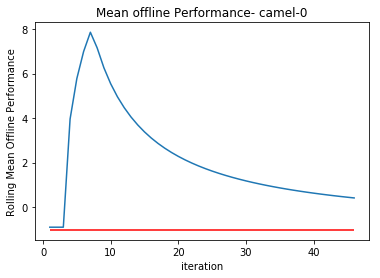

In [16]:
repeats = 1
#repeats = 10 # Paper used 10
output = []
for problem in problems:
    offlinePerformances = []
    for repeat in range(repeats):
        offlinePerf = do(problem, repeat)
        offlinePerformances.append(offlinePerf[-1])
        plotOfflinePerformance(offlinePerf, problem, repeat)
    meanOfflinePerformance = np.mean(offlinePerformances)
    output.append("~~~~~~~~~{} Mean Offline Performance: {}".format(problem.name, meanOfflinePerformance))
for o in output:
    print(o)